In [ ]:
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from keras_preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

renaming the images and saved in a single folder

In [ ]:
#dir = "/content/mount/MyDrive/fruits/fruits_validation/Tomato not Ripened"
#destination_dir = '/content/mount/MyDrive/fruits/fruits_validation/tomato'
#for count, filename in enumerate(os.listdir(dir)):
  #dst = "tomato9"+str(count)+".jpg"
  #os.rename(os.path.join(dir, filename), os.path.join(destination_dir, dst))

In [ ]:
training_dir = r"/content/mount/MyDrive/fruits/fruits_training"
train_gen = training_datagen.flow_from_directory(training_dir, target_size=(100,100), class_mode="categorical")

Found 23224 images belonging to 18 classes.


In [ ]:
validation_dir = r"/content/mount/MyDrive/fruits/fruits_validation"
val_gen = validation_datagen.flow_from_directory(validation_dir, target_size=(100,100), class_mode="categorical")

Found 7892 images belonging to 18 classes.


In [ ]:
model = keras.models.Sequential([
      Conv2D(16, (3, 3), input_shape=(100, 100, 3), activation='relu'),
      MaxPooling2D(2,2),

      Conv2D(32, (3,3), activation='relu'),
      MaxPooling2D(2,2),

      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(2,2),

      Conv2D(128, (3,3), activation='relu'),
      MaxPooling2D(2,2),

      keras.layers.Flatten(),

      keras.layers.Dense(512, activation='relu'),

      keras.layers.Dense(18, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         7

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.TruePositives(),keras.metrics.TrueNegatives(), keras.metrics.FalsePositives(), keras.metrics.FalseNegatives()])
validation_accuracy = 0.98
class myCallBack(keras.callbacks.Callback):
  def on_epcoh_end(self, epoch, logs={}):
    if (logs.get("val_acc") >= validation_accuracy):
      print("\nReached desired validation accuracy, so terminating training")
      self.model.stop_training=True
callbacks = myCallBack()

In [ ]:
fruit_model = model.fit(train_gen, epochs=10, validation_data=val_gen, verbose=1, callbacks=[callbacks], workers=10)
filepath = r"/content/mount/MyDrive/fruits/saved_model"
keras.models.save_model(
    model,
    filepath,
    overwrite = True,
    include_optimizer = True,
    save_format = "tf",
    signatures = None
)

Epoch 1/10
726/726 [==============================] - 1551s 2s/step - loss: 0.8757 - accuracy: 0.7375 - precision: 0.8427 - recall: 0.6470 - true_positives: 8856.9615 - true_negatives: 197080.7675 - false_positives: 902.1210 - false_negatives: 2789.0908 - val_loss: 0.1244 - val_accuracy: 0.9601 - val_precision: 0.9632 - val_recall: 0.9593 - val_true_positives: 7571.0000 - val_true_negatives: 133875.0000 - val_false_positives: 289.0000 - val_false_negatives: 321.0000
Epoch 2/10
726/726 [==============================] - 48s 66ms/step - loss: 0.0626 - accuracy: 0.9865 - precision: 0.9868 - recall: 0.9862 - true_positives: 11506.5928 - true_negatives: 197817.0646 - false_positives: 129.5323 - false_negatives: 137.3246 - val_loss: 0.6119 - val_accuracy: 0.8814 - val_precision: 0.8830 - val_recall: 0.8805 - val_true_positives: 6949.0000 - val_true_negatives: 133243.0000 - val_false_positives: 921.0000 - val_false_negatives: 943.0000
Epoch 3/10
726/726 [==============================] - 48s 

<Figure size 432x288 with 0 Axes>

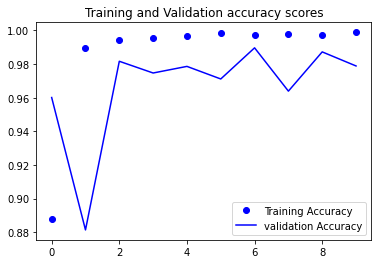

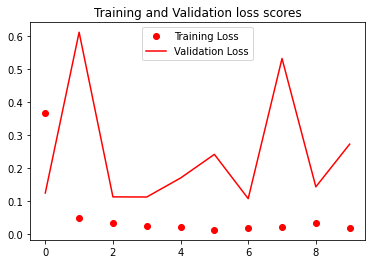

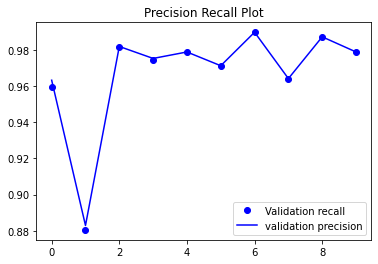

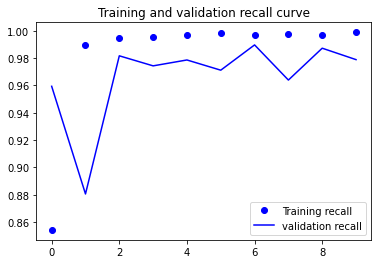

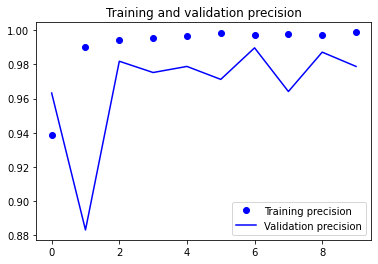

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = fruit_model.history['accuracy']
val_acc = fruit_model.history['val_accuracy']
loss = fruit_model.history['loss']
val_loss = fruit_model.history['val_loss']
recall = fruit_model.history['recall']
val_recall = fruit_model.history['val_recall']
precision = fruit_model.history['precision']
val_precision = fruit_model.history['val_precision']
val_true_positive = fruit_model.history['val_true_positives']
val_false_positive = fruit_model.history['val_false_positives']
true_positive = fruit_model.history['true_positives']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='validation Accuracy')
plt.title('Training and Validation accuracy scores')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss scores')
plt.legend()
plt.figure()

plt.plot(epochs, val_recall, 'bo', label='Validation recall')
plt.plot(epochs, val_precision, 'b', label='validation precision')
plt.title('Precision Recall Plot')
plt.legend()
plt.figure()

plt.plot(epochs, recall, 'bo', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='validation recall')
plt.title('Training and validation recall curve')
plt.legend()
plt.figure()

plt.plot(epochs, precision, 'bo', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()
plt.figure()

In [ ]:
model_dir = r"/content/mount/MyDrive/fruits/saved_model"

new_fruit_model_v2 = keras.models.load_model(
    model_dir,
    custom_objects = None,
    compile = True
)

In [ ]:
loss, acc = new_fruit_model_v2.evaluate(val_gen, verbose=2)
print('Restored model, accuracey : {:5.2f}%'.format(100*acc))

247/247 - 16s - loss: 0.2725 - accuracy: 0.9788 - precision: 0.9788 - recall: 0.9788 - true_positives: 7725.0000 - true_negatives: 133997.0000 - false_positives: 167.0000 - false_negatives: 167.0000


ValueError: ignored

In [ ]:
img = keras.preprocessing.image.load_img('/content/mount/MyDrive/fruits/fruits_test/mango2141.jpg', target_size=(100,100))
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = new_fruit_model_v2.predict_classes(images, batch_size=10)
print(classes[0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


10


In [ ]:
def fruit_prediction(image_dir):
  img_list = os.listdir(image_dir)
  for fruits in img_list:
    path = os.path.join(image_dir, fruits)
    img = image.load_img(path, target_size=(100,100))
    array = image.img_to_array(img)
    x = np.expand_dims(array, axis=0)

    vimage = np.vstack([x])
    img_classification = new_fruit_model_v2.predict(vimage)
    print(img_classification, fruits)

In [ ]:
fruit_prediction(r"/content/mount/MyDrive/fruits/fruits_test")

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] cauliflower.jpg
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] date.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]] eggplant.jpg
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ginger.jpg
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] guava.jpg
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] lychee.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] papaya.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] orange.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] pomegranate.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]] watermelon.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]] apple.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] banana3165.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] lemon2165.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] mango2141.jpg
[[0. 0. 0. 0